In [7]:
# Import libraries and data
import os
import numpy as np
import pickle

from src.utils.linear_regressor import perform_linear_regression
from config.settings import saved_models_path
from src.utils.column_import import columns_dif, columns
s_x, s_y, v_x, v_y, a_x, a_y, a_x_a, a_y_a, a_x_b, a_y_b = columns_dif

# Relative Model (2 Param)


Acceleration model with 2 parameters
\begin{align}
a_a(k) &= \overline c_1 \bigl( s_a(k) - s_b(k) \bigr)  + \overline c_2 \bigl( v_a(k) - v_b(k) \bigr) \\
\end{align}




\begin{align}
    \begin{bmatrix}
        a_{x_a}(k)   \\
        a_{y_a}(k)       
    \end{bmatrix}
    =
    \begin{bmatrix}
         (s_{x_a}(k) - s_{x_b}(k))   &  (v_{x_a}(k) - v_{x_b}(k)) \\
         (s_{y_a}(k) - s_{y_b}(k))   &  (v_{y_a}(k) - v_{y_b}(k)) \\
    \end{bmatrix}
    \begin{bmatrix}
        \overline{c}_1 \\
        \overline{c}_2 \\
   \end{bmatrix}
\end{align}


## Difference dataset

## Normal dataset

In [8]:

from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y, = columns

### Matrix creation

and same model 
but relative speed, position and acceleration

In [9]:
# Index shifting:other
# k-1         k           k+1
# 0:-2         1:-1        2:

In [10]:
# Target vector y
y = np.concatenate([a_x, a_y])    # a(k)
y.shape


(410550,)

In [11]:
X = np.vstack((
    np.column_stack((s_x, v_x)), 
    np.column_stack((s_y, v_y))
    ))
X.shape


(410550, 2)

### Perform Regression

Mean Squared Error (MSE): 3.1797e-01
Mean Absolute Error (MAE): 3.2976e-01
R-squared (R²) Score: 4.4265e-02
Coefficients:
-0.003614799758157609
0.026557608681460065


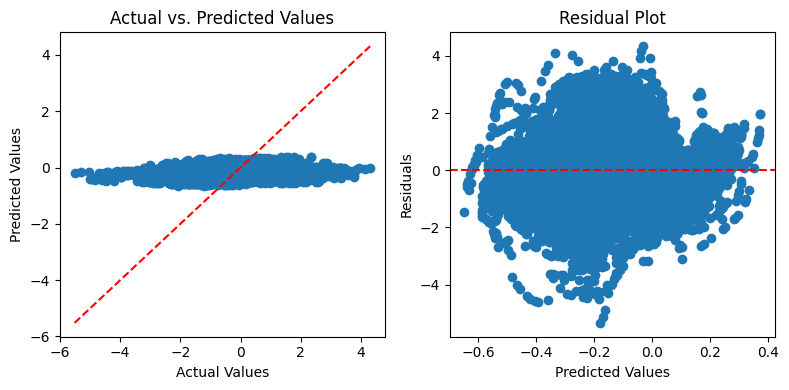

In [12]:
# First model
first_model = perform_linear_regression(X, y)


In [13]:
# Save both models in a pickle file
def save_model(model, model_name):
    model_file_path = os.path.join(saved_models_path, f'delta_model_2/{model_name}.pkl')
    
    with open(model_file_path, 'wb') as file:
        pickle.dump(model, file)
    
    print(f'Model "{model_name}" saved to: {model_file_path}')

save_model(first_model, 'first_model')



Model "first_model" saved to: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/delta_model_2/first_model.pkl
